In [1]:
!pip install scikit-learn==1.2.2

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import numpy as np

In [3]:
# Load the data
url = "https://raw.githubusercontent.com/pvateekul/2110446_DSDE_2023s2/main/DataSet/hed2020_dataset.csv"
data = pd.read_csv(url)

In [4]:
# Choose edible mushrooms only
edible_data = data[data['label'] == 'e']

In [5]:
# Select only the variables of interest
selected_features = ['cap-color-rate', 'stalk-color-above-ring-rate']
edible_data = edible_data[selected_features]

In [6]:
# Fill missing values with mean
imputer = SimpleImputer(strategy='mean')
edible_data_imputed = imputer.fit_transform(edible_data)

In [7]:
# Standardize variables with Standard Scaler
scaler = StandardScaler()
edible_data_scaled = scaler.fit_transform(edible_data_imputed)

In [8]:
# K-means clustering with 5 clusters and seed = 2020
kmeans = KMeans(n_clusters=5, random_state=2020)
kmeans.fit(edible_data_scaled)

/opt/homebrew/Caskroom/miniforge/base/envs/datasci/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=2020)

In [9]:
# Show the centroid of each cluster
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print("Centroids of each cluster (after convert back):")
print(centroids)

Centroids of each cluster (after convert back):
[[4.2934616  1.70225065]
 [1.         6.76190476]
 [1.01351351 1.85661095]
 [8.47126437 1.        ]
 [5.88222965 6.        ]]


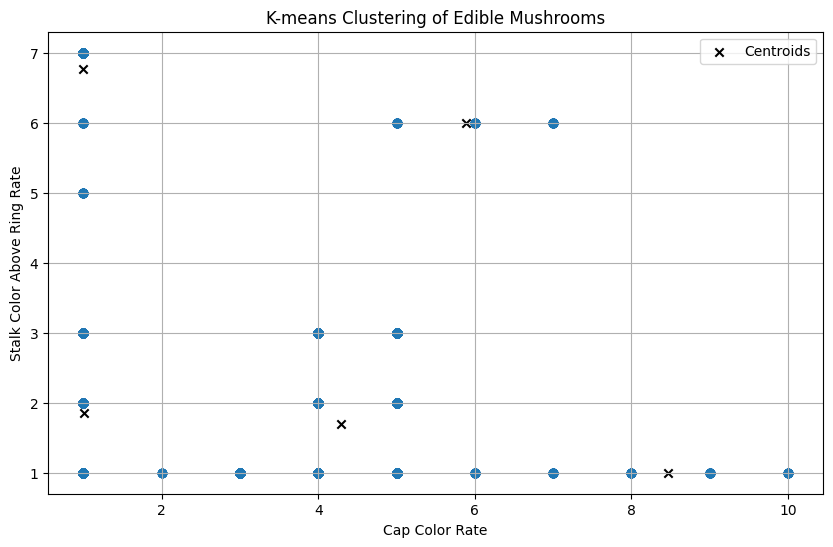

In [17]:
import matplotlib.pyplot as plt

# Scatter plot of clusters
plt.figure(figsize=(10, 6))

# All point
plt.scatter(edible_data['cap-color-rate'], edible_data['stalk-color-above-ring-rate'])

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='black', label='Centroids')

plt.xlabel('Cap Color Rate')
plt.ylabel('Stalk Color Above Ring Rate')
plt.title('K-means Clustering of Edible Mushrooms')
plt.legend()
plt.grid(True)
plt.show()